

# Project: Investigate TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is an analysis on the TMDB dataset. The TMDB dataset contains 10866 movies with the specifications of the movie.

This analysis will be focusing on:

1. Top 4 genres of movie from 1966 to 2016
2. Does profit has a connection with a genres popularity.


In [1]:
#importing all packages needed for this analysis
import unicodecsv, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv("tmdb-movies.csv")
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15



### Data Cleaning
1. Processing the Genre column
2. Reorganizing data 

#### 1. Processing the Genre column
The genre column in the dataset is contructed under the format of a string with each genre splitted by the "|". The task ahead is to refractor the genre column so that it is easier to access and collect data.

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# WARNING: only run this section once, because multiple runs will alter the data structure, causing unwanted bugs

# 1. Processing the Genre column

# a. dropna and then set every value back to string 
movie_df["genres"] = movie_df["genres"].fillna("Unknown")
def split_list(x):
    return x.split("|")
movie_df["genres"] = movie_df["genres"].apply(split_list)

movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The genres that is null has been replace with Unknown. The analysis will treat Unknown as a seperate genre for analysis.

#### 2. Reorganizing the dataset


i. Adding a profit column

In [4]:
# c. putting a profit column into the data frame
movie_df["profit"] = movie_df["revenue"] - movie_df["budget"]

ii. Creating a method to collect the specify statistic of each genre by year. The method return a dictionary with the movie genres as the key and the statistics as the value.

Exp: stats_genre_by_year(2015, profit) will return a dictionary of each genres with their total profits in year 2015


In [5]:
# Getting a table of how famous each genre is by year.
# Parameter: year - the year that every genres will be collected from. Year is range from 1966 to 2015
#            field - the column of the statistic that will be collect. List of acceptable fields are:
#                    id imdb_id popularity budget revenue original_title cast homepage director tagline overview
#                    runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj
def stats_genre_by_year(year, field):
    sub_df = movie_df[movie_df["release_year"] == year]
    test1 = list()
    test2 = list()
    genres_popularity = {}
    for x, elem1 in enumerate(sub_df["genres"]):
        test1.append(elem1)
    for y, elem2 in enumerate(sub_df[str(field)]):
        test2.append(elem2)
        
    for n in range(len(test1)):
        for m in range(len(test1[n])):
            
            if(test1[n][m] not in genres_popularity):
                genres_popularity[str(test1[n][m])] = test2[n]
            else:
                genres_popularity[str(test1[n][m])] += test2[n]
            
    return genres_popularity

print(stats_genre_by_year(2015, "profit"))
print(stats_genre_by_year(2015, "popularity"))

{'Action': 9672698002, 'Adventure': 9990362959, 'Science Fiction': 7165632103, 'Thriller': 5620617271, 'Fantasy': 2857039294, 'Crime': 3125612743, 'Western': 437139714, 'Drama': 4241980714, 'Family': 3782878913, 'Animation': 3263955801, 'Comedy': 5460018689, 'Mystery': 422685130, 'Romance': 1279534699, 'War': 492095829, 'History': 62906704, 'Music': 562485274, 'Horror': 674321673, 'Documentary': 30270526, 'TV Movie': -3000000, 'Unknown': 0}
{'Action': 240.90142099999994, 'Adventure': 226.58126100000001, 'Science Fiction': 193.12188600000005, 'Thriller': 239.7209069999999, 'Fantasy': 57.427531999999978, 'Crime': 87.823616999999999, 'Western': 19.072777000000002, 'Drama': 243.84809099999981, 'Family': 60.237690000000008, 'Animation': 44.705638, 'Comedy': 152.04131699999996, 'Mystery': 51.023583999999978, 'Romance': 54.085298999999985, 'War': 11.560599999999997, 'History': 15.118574000000001, 'Music': 20.958332999999989, 'Horror': 59.583763000000026, 'Documentary': 10.85755, 'TV Movie': 5

Creating a dataframe of each genres with its popularity from 1966 to 2015

In [6]:
# Recording every year genres's popularity
genres_by_years = {}

genres_by_years_test = {}

for x in range(1966, 2016):
    genres_by_years[x] = pd.Series(list(stats_genre_by_year(x, "popularity").values()), index = list(stats_genre_by_year(x, "popularity").keys()))
    
genres_by_years_df = pd.DataFrame(genres_by_years)

print("Null values in the dataframe: ", dict(genres_by_years_df.isnull().sum()))

print()
#Process null value by replacing the null value with 0
genres_by_years_df = genres_by_years_df.fillna(0)

print("Null values in the dataframe: ", dict(genres_by_years_df.isnull().sum()))

genres_by_years_df

Null values in the dataframe:  {1966: 3, 1967: 4, 1968: 4, 1969: 3, 1970: 0, 1971: 3, 1972: 5, 1973: 3, 1974: 1, 1975: 3, 1976: 2, 1977: 3, 1978: 1, 1979: 5, 1980: 3, 1981: 3, 1982: 1, 1983: 2, 1984: 3, 1985: 3, 1986: 4, 1987: 3, 1988: 2, 1989: 1, 1990: 1, 1991: 2, 1992: 2, 1993: 2, 1994: 1, 1995: 1, 1996: 1, 1997: 2, 1998: 1, 1999: 1, 2000: 0, 2001: 0, 2002: 1, 2003: 1, 2004: 1, 2005: 0, 2006: 1, 2007: 1, 2008: 0, 2009: 1, 2010: 0, 2011: 1, 2012: 0, 2013: 1, 2014: 1, 2015: 1}

Null values in the dataframe:  {1966: 0, 1967: 0, 1968: 0, 1969: 0, 1970: 0, 1971: 0, 1972: 0, 1973: 0, 1974: 0, 1975: 0, 1976: 0, 1977: 0, 1978: 0, 1979: 0, 1980: 0, 1981: 0, 1982: 0, 1983: 0, 1984: 0, 1985: 0, 1986: 0, 1987: 0, 1988: 0, 1989: 0, 1990: 0, 1991: 0, 1992: 0, 1993: 0, 1994: 0, 1995: 0, 1996: 0, 1997: 0, 1998: 0, 1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}


,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,3.686859,5.064989,2.193374,5.399760,2.658147,6.605274,3.247743,8.464960,5.867692,2.670626,...,60.259233,72.254120,88.585296,93.794086,100.713037,121.681073,111.986677,122.089178,216.979690,240.901421
Adventure,3.229519,7.178829,5.545733,3.744663,4.214834,3.234661,2.325218,3.654709,3.724634,7.042379,...,51.830019,51.230969,63.528230,81.966362,80.258813,70.028286,73.073879,84.475720,162.845275,226.581261
Animation,1.757152,2.697610,0.906404,0.876822,2.255437,0.630778,0.198304,2.869577,0.218245,0.032936,...,31.127168,22.483369,28.397969,39.754622,34.745996,44.387170,32.214146,36.320297,40.464223,44.705638
Comedy,5.178531,7.391972,2.965935,3.246052,5.336434,3.576622,3.534842,3.495928,5.303014,7.205788,...,97.197895,79.415945,86.858673,111.045444,99.039863,115.304366,104.231064,105.688203,160.332602,152.041317
Crime,1.703508,3.768515,2.779596,2.844060,1.199209,4.563638,7.509376,7.861367,9.086782,1.358177,...,35.458092,44.358441,47.708682,28.100370,35.293322,42.801786,46.632713,65.017269,57.459754,87.823617
Documentary,0.080598,0.095101,0.000000,0.000000,0.640959,0.000000,0.265169,0.021941,0.202033,0.125881,...,3.302558,4.260955,4.423501,5.222750,7.878228,9.250019,7.590372,10.321471,11.046404,10.857550
Drama,5.436264,8.183477,7.546450,6.368528,6.015169,12.093149,11.127861,14.752277,11.044738,9.498630,...,109.448943,109.945124,123.854529,126.897208,123.715224,128.088313,140.376994,166.999176,246.362717,243.848091
Family,2.792269,2.886044,2.131317,1.609108,2.679867,3.061445,0.409150,3.253457,1.044319,0.621159,...,50.407490,39.023420,44.220459,49.350055,53.233292,55.893736,31.257886,39.526268,47.765725,60.237690
Fantasy,0.849542,0.561027,2.227921,0.408196,0.937610,3.061445,0.432033,0.383880,1.279553,3.454561,...,34.786562,44.995426,37.681697,50.608117,46.964090,46.534893,46.166250,39.743062,65.856645,57.427532
Foreign,0.723112,0.000000,0.000000,0.000000,0.092150,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.371926,3.874893,3.780533,3.768824,2.570107,1.819813,0.597536,0.000000,0.000000,0.000000


Creating another dataframe of each genres with its profits from 1966 to 2015

In [7]:
# Recording every year genres's profit
profit_by_years = {}
genres_list = list(stats_genre_by_year(x, "profit").keys())

for x in range(1966, 2016):
    profit_by_years[x] = pd.Series(list(stats_genre_by_year(x, "profit").values()), index = list(stats_genre_by_year(x, "profit").keys()))
    
profit_by_years_df = pd.DataFrame(profit_by_years)

print("Null values in the dataframe: ", dict(profit_by_years_df.isnull().sum()))

print()
#Process null value by replacing the null value with the mean value
profit_by_years_df = profit_by_years_df.fillna(profit_by_years_df.mean())

print("Null values in the dataframe: ", dict(profit_by_years_df.isnull().sum()))

profit_by_years_df

Null values in the dataframe:  {1966: 3, 1967: 4, 1968: 4, 1969: 3, 1970: 0, 1971: 3, 1972: 5, 1973: 3, 1974: 1, 1975: 3, 1976: 2, 1977: 3, 1978: 1, 1979: 5, 1980: 3, 1981: 3, 1982: 1, 1983: 2, 1984: 3, 1985: 3, 1986: 4, 1987: 3, 1988: 2, 1989: 1, 1990: 1, 1991: 2, 1992: 2, 1993: 2, 1994: 1, 1995: 1, 1996: 1, 1997: 2, 1998: 1, 1999: 1, 2000: 0, 2001: 0, 2002: 1, 2003: 1, 2004: 1, 2005: 0, 2006: 1, 2007: 1, 2008: 0, 2009: 1, 2010: 0, 2011: 1, 2012: 0, 2013: 1, 2014: 1, 2015: 1}

Null values in the dataframe:  {1966: 0, 1967: 0, 1968: 0, 1969: 0, 1970: 0, 1971: 0, 1972: 0, 1973: 0, 1974: 0, 1975: 0, 1976: 0, 1977: 0, 1978: 0, 1979: 0, 1980: 0, 1981: 0, 1982: 0, 1983: 0, 1984: 0, 1985: 0, 1986: 0, 1987: 0, 1988: 0, 1989: 0, 1990: 0, 1991: 0, 1992: 0, 1993: 0, 1994: 0, 1995: 0, 1996: 0, 1997: 0, 1998: 0, 1999: 0, 2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0}


,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,4.547000e+06,1.521295e+08,5.321087e+07,58614493.0,85095048,2.686216e+08,1.504429e+08,3.020654e+08,357738653.0,8.386070e+07,...,3.043890e+09,4.367857e+09,4716633676,6.215995e+09,3670067248,5.976329e+09,7119115485,5.739239e+09,9.022731e+09,9.672698e+09
Adventure,8.707200e+06,3.449731e+08,7.561080e+07,83259047.0,68438266,9.692162e+07,1.301855e+08,1.652778e+08,155872000.0,5.309829e+08,...,3.569236e+09,5.035004e+09,3466041189,8.162274e+09,5789413154,7.027280e+09,8127478715,6.742754e+09,8.065012e+09,9.990363e+09
Animation,-3.150000e+05,2.018434e+08,0.000000e+00,0.0,51675257,-2.000000e+07,-8.500000e+05,1.705647e+07,0.0,0.000000e+00,...,1.522862e+09,2.148725e+09,1712939005,2.345419e+09,2922782932,2.917325e+09,2769261875,3.936189e+09,2.315285e+09,3.263956e+09
Comedy,-2.392800e+06,1.722965e+08,-1.150000e+07,-1500000.0,142817863,-2.320000e+07,1.787929e+07,2.846841e+08,260296408.0,1.528546e+08,...,3.866368e+09,4.631902e+09,3630629100,4.898913e+09,3913162531,4.685514e+09,4511231848,4.386980e+09,4.930026e+09,5.460019e+09
Crime,-1.377800e+06,9.029775e+07,3.381087e+07,94448889.0,-8500000,8.963317e+07,3.030462e+08,3.546013e+08,152645916.0,7.155030e+07,...,1.142226e+09,1.085503e+09,1938039205,5.728654e+08,645487616,1.218973e+09,1594237980,1.650650e+09,3.836959e+08,3.125613e+09
Documentary,0.000000e+00,0.000000e+00,3.403939e+07,33987122.0,0,5.263014e+07,0.000000e+00,0.000000e+00,30000.0,0.000000e+00,...,1.083670e+08,9.935755e+07,8352818,-4.009834e+07,6559622,1.257926e+08,54013023,1.995657e+07,9.566020e+05,3.027053e+07
Drama,1.623669e+07,2.887215e+08,1.270972e+08,134133942.0,375311994,1.620083e+08,2.881388e+08,8.401375e+08,296005485.0,2.008831e+08,...,2.559976e+09,2.748825e+09,3899577476,3.406829e+09,2808190727,2.317829e+09,5433195210,3.376270e+09,3.889976e+09,4.241981e+09
Family,-2.392800e+06,1.928436e+08,-3.200000e+06,0.0,51675257,-1.900000e+07,0.000000e+00,2.805647e+07,0.0,2.000000e+07,...,2.293314e+09,3.621175e+09,2491049464,3.720559e+09,5444987212,4.714807e+09,2911502707,4.287454e+09,2.420693e+09,3.782879e+09
Fantasy,0.000000e+00,-9.000000e+06,-1.000000e+07,0.0,0,-1.900000e+07,-3.200000e+06,1.100000e+07,0.0,2.312895e+07,...,1.970900e+09,4.392694e+09,2212005904,4.715555e+09,3662354455,4.346387e+09,4156351147,3.095181e+09,4.066793e+09,2.857039e+09
Foreign,0.000000e+00,1.090402e+08,3.403939e+07,33987122.0,-25000000,5.263014e+07,6.288873e+07,1.823101e+08,96692054.0,1.412813e+08,...,-2.500000e+03,-3.362767e+07,100650098,-1.755000e+07,-15415990,-5.652660e+06,0,2.219588e+09,2.440182e+09,2.956962e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Top 4 genres of movie from 1966 to 2016



In [8]:
def plot_stat_years(df, list_genres, stat_name):
    for x in list_genres:
        df.loc[x].plot()
    
    plt.legend(list_genres, loc = "upper left")
    plt.xlabel("Year")
    plt.ylabel(stat_name)
    plt.title("Comparison between top 4 movie genres " + stat_name + " from 1966 to 2015")
    plt.show()


Selecting the top 4 genres for visualization:

In [9]:
dfx = pd.concat([genres_by_years_df.idxmax(), genres_by_years_df.max()], axis = 1)
dfx.groupby(0).count()

,1
0,
Action,4
Adventure,2
Comedy,8
Drama,35
Thriller,1


Plotting the top 4 genres that has most popularity within the year range of 1966 to 2015

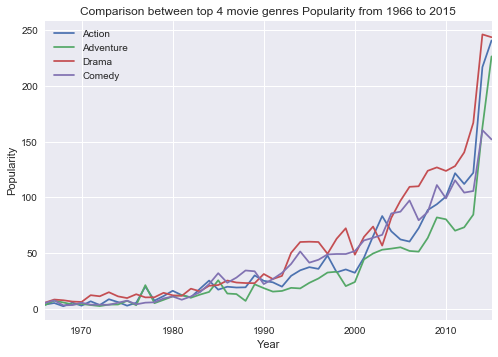

In [10]:
list_genres_names = ["Action","Adventure","Drama", "Comedy"]
plot_stat_years(genres_by_years_df, list_genres_names, "Popularity")



From 1966 to 2015, Drama is the most popular genres for most of the years. Although Comedy has more years which it rises into number 1, the popularity of it from 2010 to 2015 is uncomparable to the rise of both Drama and Action genres. 

### Research Question 2 : Does profit has a connection with a genres popularity.


1D analysis for profit

Counting the number of time each genres got the max profit in the year range 1966 to 2015

In [11]:
dfy = pd.concat([profit_by_years_df.idxmax(), profit_by_years_df.max()], axis = 1)
dfy.groupby(0).count()

,1
0,
Action,11
Adventure,13
Comedy,8
Crime,1
Drama,13
Horror,1
Thriller,3


Plotting the top 4 genres that has most popularity within the year range of 1966 to 2015

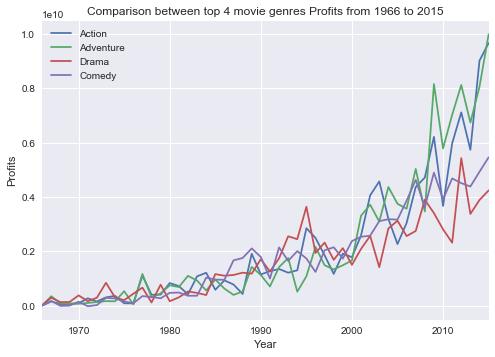

In [12]:
plot_stat_years(profit_by_years_df, list_genres_names, "Profits")

From 1966 to 2015, drama and adventure is the most profitable genres for most of the years. However, in recent years, action movies and adventure movies tends to profit more than comedy and drama. 

Correlation between popularity of genres and profit of genres:

Making 4 different scatter plot for 4 genres Action, Adventure, Drama, Comedy to see if there is any correlation between the profit and the popularity

In [13]:
def pop_vs_prof_plot(genres_df, profit_df, list_genres):
    for x in list_genres:
        plt.scatter(genres_df.loc[x], profit_by_years_df.loc[x])
        plt.title(x + " popularity plot vs genres profit")
        plt.xlabel("Popularity")
        plt.ylabel("Profit")
        plt.show()


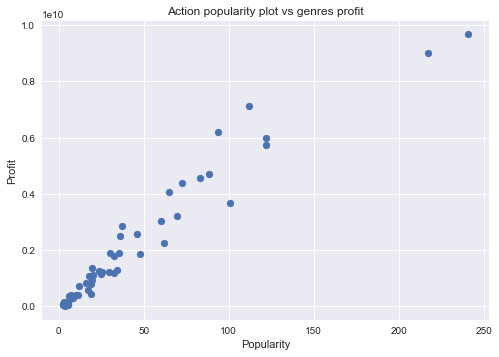

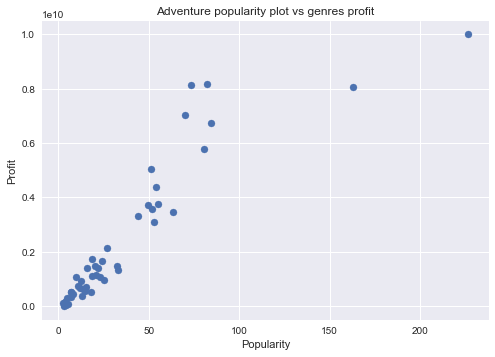

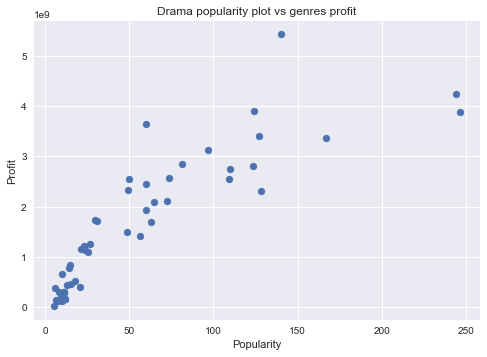

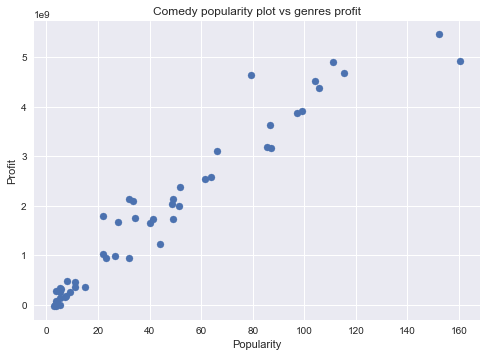

In [14]:
pop_vs_prof_plot(genres_by_years_df, profit_by_years_df, list_genres_names)

From 4 plots above, there is a linear correllation between a genres popularity with its profit. The more popular a genres get, the more profit it will generate.

<a id='conclusions'></a>
## Conclusions

From the analysis above we have answered 2 questions set out in from the beginning:
1. Top 4 genres of movie from 1966 to 2016
2. Does profit has a connection with a genres popularity.

For question 1, top 4 movies genres are Action, Adventure, Drama, and Comedy. From 1966 to 2015, Drama is the most popular genres for most of the years. Although Comedy has more years which it rises into number 1, the popularity of it from 2010 to 2015 is uncomparable to the rise of both Drama and Action genres.

For question 2, there is a connection between genres popularity with the genres profit. From the scatter plot of each genres profit vs its popularity, there is a linear regressing relationship between profit and popularity. The more popular a genres get, the more profit it will generate.

The analysis has some limitation:
- Some movies genres are undefined, so the genres of that movie would be listed as unknown.
- The profits vs popularity analysis is only based on top 4 genres
- The profits vs popularity analysis can only be conclude using observation, there is not regression analysis done to calculate the exact correllation between profits and popularity of a genres.